In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [2]:
song_path = '../DSD100/Mixtures/Dev/051 - AM Contra - Heart Peripheral/mixture.wav'

Load song

In [3]:
audio_arr, sr = librosa.load(song_path, sr = 8192)

In [4]:
audio_arr.shape

(1721187,)

Audio play

In [5]:
Audio(audio_arr, rate = sr)

display audio array

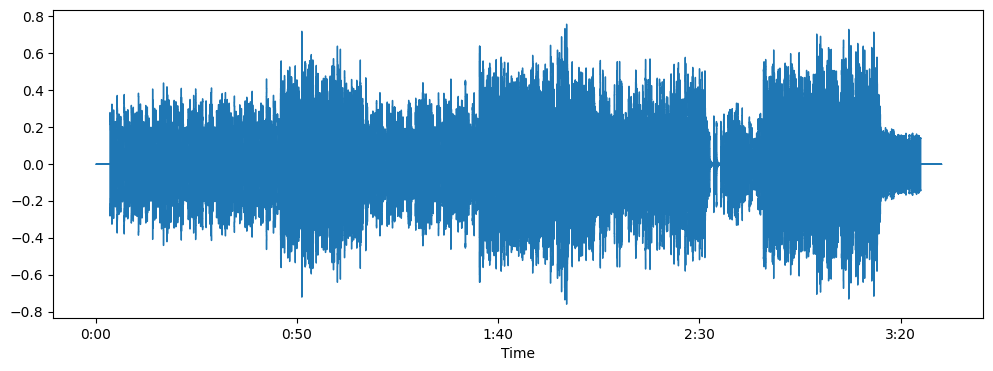

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_arr, sr = sr)
plt.show()

STFT

In [7]:
audio_stft = librosa.stft(audio_arr, n_fft = 1024, hop_length = 768)

In [8]:
audio_stft.shape

(513, 2242)

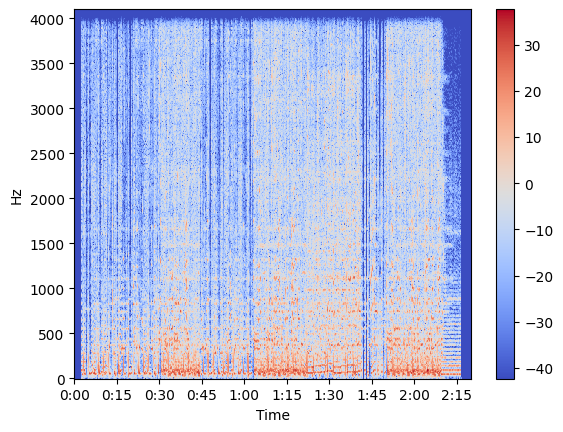

In [9]:
audio_stft_db = librosa.amplitude_to_db(np.abs(audio_stft))
librosa.display.specshow(audio_stft_db, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()
plt.show()

Normalize stft between [0,1]

In [10]:
audio_stft = (np.abs(audio_stft)-np.min(np.abs(audio_stft))) / (np.max(np.abs(audio_stft))-np.min(np.abs(audio_stft)))

select stft of size 512,128

In [11]:
audio = librosa.istft(audio_stft[:,:128], hop_length=768, n_fft=1024)

In [12]:
audio_stft[:,:128].shape

(513, 128)

In [13]:
Audio(audio, rate = sr)

make spectrogram and save in .npz file

In [14]:
dataset_path = '../DSD100'
mixture_path = dataset_path +'/' + sorted(os.listdir(dataset_path))[0]

sources_path = dataset_path +'/' + sorted(os.listdir(dataset_path))[1]
Dev_path = sources_path+ '/' + sorted(os.listdir(mixture_path))[0]
Test_path = sources_path+ '/' + sorted(os.listdir(mixture_path))[1]

In [15]:
sorted(os.listdir(mixture_path))

['Dev', 'Test']

In [16]:
song_name = sorted(os.listdir(Dev_path))[0]
song_path = Dev_path + '/' + song_name

In [17]:
song_path

'../DSD100/Sources/Dev/051 - AM Contra - Heart Peripheral'

In [18]:
sorted(os.listdir(song_path))

['bass.wav', 'drums.wav', 'other.wav', 'vocals.wav']

In [19]:
sorted(os.listdir(mixture_path))

['Dev', 'Test']

In [20]:
dataset_path = '../DSD100'

mixture_folder_path = dataset_path +'/' + sorted(os.listdir(dataset_path))[0]

sources_folder_path = dataset_path +'/' + sorted(os.listdir(dataset_path))[1]

rate = 8192
window_size = 1024
hop_lenght = 768

In [21]:
for folder in sorted(os.listdir(mixture_folder_path)):
    mixture_song_folder_path = mixture_folder_path + '/' + folder
    sources_song_folder_path = sources_folder_path + '/' + folder
    for song_name in sorted(os.listdir(mixture_song_folder_path)):
        mixture_path = mixture_song_folder_path+'/'+song_name + '/' + sorted(os.listdir(mixture_song_folder_path+'/'+song_name))[0]
        # print(mixture_path)
        bass_path = sources_song_folder_path+'/'+song_name + '/' + sorted(os.listdir(sources_song_folder_path+'/'+song_name))[0]
        # print(bass_path)
        drum_path = sources_song_folder_path+'/'+song_name + '/' + sorted(os.listdir(sources_song_folder_path+'/'+song_name))[1]
        # print(drum_path)
        vocal_path = sources_song_folder_path+'/'+song_name + '/' + sorted(os.listdir(sources_song_folder_path+'/'+song_name))[3]
        # print(vocal_path)
        song_name = song_name.replace('&', 'and')
        print(song_name)
        # load .wav file
        mixture_arr, _ = librosa.load(mixture_path, sr = rate)
        bass_arr, _ = librosa.load(bass_path, sr = rate)
        drum_arr, _ = librosa.load(drum_path, sr = rate)
        vocal_arr, _ = librosa.load(vocal_path, sr = rate)
        instrumental_arr = mixture_arr - vocal_arr

        # use stft on audio file
        mixture_stft = librosa.stft(mixture_arr, n_fft = window_size, hop_length = hop_lenght)
        bass_stft = librosa.stft(bass_arr, n_fft = window_size, hop_length = hop_lenght)
        drum_stft = librosa.stft(drum_arr, n_fft = window_size, hop_length = hop_lenght)
        vocal_stft = librosa.stft(vocal_arr, n_fft = window_size, hop_length = hop_lenght)
        instrumental_stft = librosa.stft(instrumental_arr, n_fft = window_size, hop_length = hop_lenght)

        # normalize stft between [0, 1]
        mixture_stft = ((np.abs(mixture_stft)-np.min(np.abs(mixture_stft)))
                      / (np.max(np.abs(mixture_stft))-np.min(np.abs(mixture_stft)))
                      )
        bass_stft = ((np.abs(bass_stft)-np.min(np.abs(bass_stft)))
                      / (np.max(np.abs(bass_stft))-np.min(np.abs(bass_stft)))
                      )
        drum_stft = ((np.abs(drum_stft)-np.min(np.abs(drum_stft)))
                      / (np.max(np.abs(drum_stft))-np.min(np.abs(drum_stft)))
                      )
        vocal_stft = ((np.abs(vocal_stft)-np.min(np.abs(vocal_stft)))
                      / (np.max(np.abs(vocal_stft))-np.min(np.abs(vocal_stft)))
                      )
        instrumental_stft = ((np.abs(instrumental_stft)-np.min(np.abs(instrumental_stft)))
                      / (np.max(np.abs(instrumental_stft))-np.min(np.abs(instrumental_stft)))
                      )
        index = 1
        # print(mixture_stft.shape[1])
        for i in range(0,mixture_stft.shape[1], 25):
            # print(i)
            if 128 + i >= mixture_stft.shape[1]:
                # print(128+i)
                break
            np.savez(
                f'../DSD100spectrogram/{song_name}{index}.npz',
                mixture = mixture_stft[:, 0+i:128+i], bass = bass_stft[:, 0+i:128+i],
                drum = drum_stft[:, 0+i:128+i], vocal = vocal_stft[:, 0+i:128+i],
                instrumental = instrumental_stft[:, 0+i:128+i]
                )
            index +=1
        # break

print('.npz file save complete')

051 - AM Contra - Heart Peripheral
052 - ANiMAL - Easy Tiger
053 - Actions - Devil's Words
054 - Actions - South Of The Water
055 - Angels In Amplifiers - I'm Alright
056 - Arise - Run Run Run
057 - BKS - Bulldozer
058 - Ben Carrigan - We'll Talk About It All Tonight
059 - Black Bloc - If You Want Success
060 - Buitraker - Revo X
061 - Chris Durban - Celebrate
062 - Cristina Vane - So Easy
063 - Detsky Sad - Walkie Talkie
064 - Enda Reilly - Cur An Long Ag Seol
065 - Fergessen - Nos Palpitants
066 - Flags - 54
067 - Georgia Wonder - Siren
068 - Giselle - Moss
069 - Hollow Ground - Left Blind
070 - James May - All Souls Moon
071 - James May - If You Say
072 - Jay Menon - Through My Eyes
073 - Johnny Lokke - Whisper To A Scream
074 - Juliet's Rescue - Heartbeats
075 - Leaf - Summerghost
076 - Little Chicago's Finest - My Own
077 - Lyndsey Ollard - Catching Up
078 - Moosmusic - Big Dummy Shake
079 - Mu - Too Bright
080 - North To Alaska - All The Same
081 - Patrick Talbot - Set Me Free
08

use save_npz.py 

In [1]:
from Save_audio_to_npz.save_npz import save_stft

In [10]:
dataset_path = '../DSD100'
save_path = '../DSD100spectrogram'

In [ ]:
save_stft(dataset_path, save_path)